In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
from scipy import interpolate

In [2]:
import scipy

In [3]:
import pandas as pd

In [4]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('viridis', 8)

In [5]:
from scipy.interpolate import interp1d

In [6]:
from dvr_setup_and_plotting_utils import *

200.0
potential written
dvr is set up


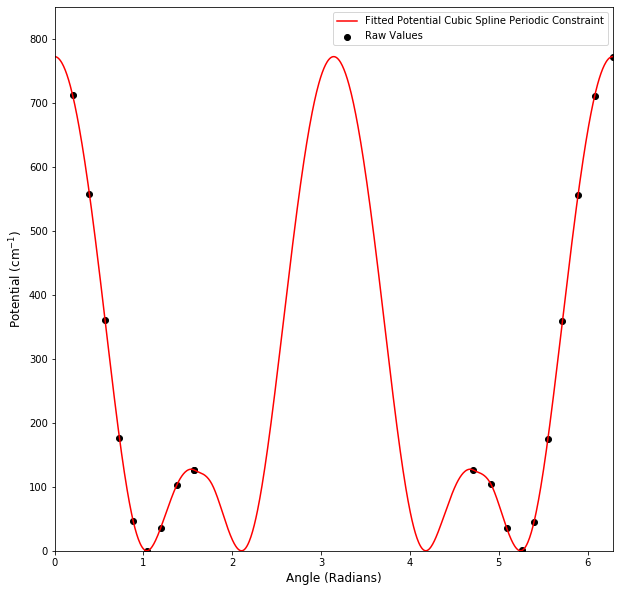

In [7]:
# Run and collect ground state

# Reduced mass of freqency calculation =

mass_ground = 1836*200
print(str(mass_ground/1836))

num_wavefunctions_ground = 5
grid_points = 500


fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='gs_scan_no_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='gs_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.00)

#fit_linear_potential_assume_periodic_write_to_file(raw_potential_filename='gs_scan_no_water_raw_pot_optimized.dat',num_grid_points=grid_points,
#                                output_potential_filename='gs_scan_no_water_fitted.dat',shift_origin=0,scale_factor=1.0)


print('potential written')

setup_dvr(num_states=num_wavefunctions_ground,num_grid_points=grid_points,mass=mass_ground,
                         potential_energy_file_name='gs_scan_no_water_fitted.dat',
                        output_file_name='gs_scan_no_h2o')

print('dvr is set up')
# Now need to make the output potential the potential_file.dat and run 
# ./dvr_1d_periodic

In [77]:
# At this point in the directory where the files are made
# ! cp gs_scan_no_water_fitted.dat  potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above
# User must supply their own matrix diagonalization subroutine


200.0
potential written
dvr is set up


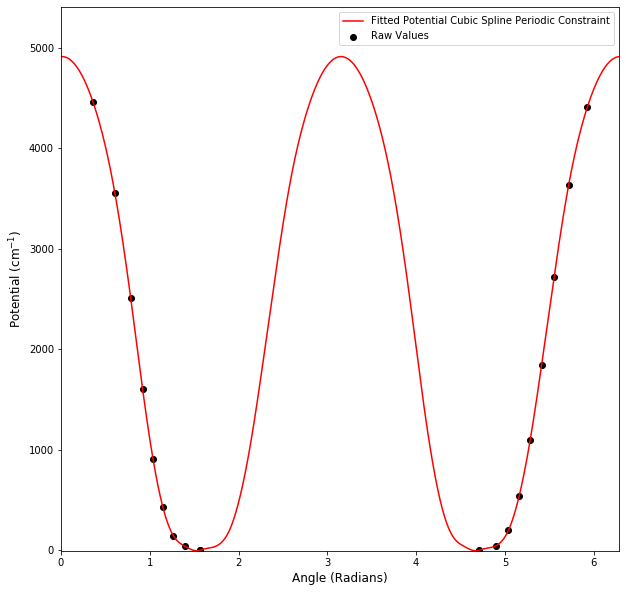

In [8]:
# run DVR
# Now run excited state

mass_excited =   mass_ground
num_wavefunctions_excited = 200
print(str(mass_excited/1836))

fit_potential_spline_assume_periodic_write_to_file(raw_potential_filename='es_scan_no_water_raw_pot_optimized.dat',num_grid_points=grid_points,
                                output_potential_filename='es_scan_no_water_fitted.dat',shift_origin=0.0,scale_factor=1.0)

print('potential written')

setup_dvr(num_states=num_wavefunctions_excited,num_grid_points=grid_points,mass=mass_excited,
                         potential_energy_file_name='es_scan_no_water_fitted.dat',
                        output_file_name='es_scan_no_h2o')

print('dvr is set up')

In [81]:
# At this point in the directory where the files are made
# ! cp es_scan_no_water_fitted.dat potential_file.dat
# ! ./dvr_1d_periodic

# This will run the DVR calculation and calculate the wavefunctions
# They are stored with the output name specified above

In [9]:
# Absolute square value of overlaps is calculated here

In [29]:
wavefunction_overlaps = calculate_overlaps_multiple_vib_shifts(
                                         ground_state_file_name_root='gs_scan_no_h2o',
                                         excited_state_file_name_root='es_scan_no_h2o',
                                         max_num_ground_state_wfs=4,
                                         max_num_excited_state_wfs=100,
                                         ground_state_max_energy=300,
                                         excited_state_max_energy=950,vib_shifts=[180.0,295.0],vib_scales=[3.0,5.0])

Calculating overlap for transition with energy 0.0
Calculating overlap for transition with energy 0.00020980235588286756
Calculating overlap for transition with energy 41.00400143269028
Calculating overlap for transition with energy 41.004003763427825
Calculating overlap for transition with energy 82.36385218325886
Calculating overlap for transition with energy 82.36396127881886
Calculating overlap for transition with energy 128.27447170156358
Calculating overlap for transition with energy 128.2744728957463
Calculating overlap for transition with energy 178.0751961734539
Calculating overlap for transition with energy 178.0752928725603
Calculating overlap for transition with energy 231.58892721406758
Calculating overlap for transition with energy 231.5889314777006
Calculating overlap for transition with energy 287.7097285581821
Calculating overlap for transition with energy 287.7098153104569
Calculating overlap for transition with energy 346.27140235712517
Calculating overlap for transi

In [30]:
#This produces a list of dictionaries
# Showing example
wavefunction_overlaps[88]

{'energy': 0.0008201413061799962,
 'ground_state_id': 'gs_scan_no_h2o_1_vib_excited_0',
 'excited_state_id': 'es_scan_no_h2o_1_vib_excited_0',
 'overlap': 1.3996594133618011e-11}

In [31]:
overlap_df = pd.DataFrame(wavefunction_overlaps)

In [32]:
# Initial spectral plots

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:70: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:76: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:80: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual 

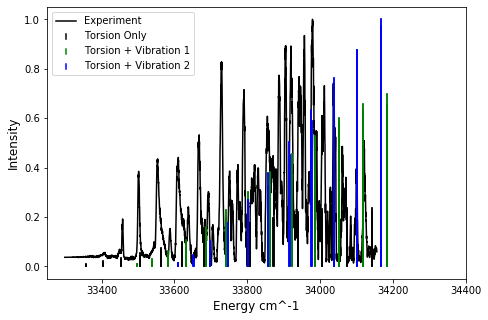

In [39]:
# Now, convert from a.u. to cm^-1, plot stem plot and compare to the experimental spectrum

offset = 33275

kidwell_uv_spectrum_energy = np.loadtxt('2PhPy UV Spectrum.txt',usecols=1)
kidwell_uv_spectrum_intensity = np.loadtxt('2PhPy UV Spectrum.txt',usecols=0)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm^-1', fontsize = 12)
ax.set_ylabel('Intensity', fontsize = 12)
# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(33250,34400)
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity,label='Experiment', color='k',ls='-')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_0_for_plotting = list()
wavefunction_excited_vib_state_1_for_plotting = list()


# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited_0' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_0_for_plotting.append(wavefunction_overlap)
    elif 'vib_excited_1' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_1_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)

# Normalize the bar heights

wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_0_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_0_for_plotting)

wavefunction_excited_vib_state_1_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_1_for_plotting)

max_ground_state_height = max(wavefunction_ground_vib_state_for_plotting_df['overlap'])
max_vib_0_excited_state_height = max(wavefunction_excited_vib_state_0_for_plotting_df['overlap'])
max_vib_1_excited_state_height = max(wavefunction_excited_vib_state_1_for_plotting_df['overlap'])

max_height = max(max_ground_state_height,max_vib_0_excited_state_height,max_vib_1_excited_state_height)

#ax.stem(vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='All',
#       basefmt=" ")

ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap']/max_height,linefmt='k-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

#print(wavefunction_ground_vib_state_for_plotting_df)

ax.stem(wavefunction_excited_vib_state_0_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_0_for_plotting_df['overlap']/max_height,linefmt='g-',markerfmt=' ',label='Torsion + Vibration 1',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_1_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_1_for_plotting_df['overlap']/max_height,linefmt='b-',markerfmt=' ',label='Torsion + Vibration 2',
       basefmt=" ")



#ax.stem(ground_vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        ground_vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='n=0 ground origin',
 #      basefmt=" ")

ax.legend()
plt.savefig('./theory_exp_spectrum_multiple_vibs.pdf')
plt.show()

In [34]:
# Plot now with linewidth
# Reads in a list of frequencies and intensities
# Then produces two text files that have the right spectrum
def calc_spectrum_plot(freq_list=None,int_list=None,
                       min_freq=0.0,max_freq=0.0,width=1,resolution=0.05):
    
    num_points = int((max_freq-min_freq)/(resolution))
    
    frequencies = list()
    intensities = list()
    
    for i in range(0,num_points):
        frequency = min_freq+i*resolution
        intensity = 0.0
        
        for j in range(0,len(freq_list)):
            peak_center = freq_list[j]
            peak_height = int_list[j]
           # print(peak_center)
           # print(peak_height)
            intensity = intensity + peak_height*np.exp(-(frequency - peak_center)**2/(2*width))
    
        frequencies.append(frequency)
        intensities.append(intensity)
    
    return frequencies,intensities


In [35]:
theory_frequencies,theory_intensities = calc_spectrum_plot(
                    freq_list=vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset,
                    int_list=vibrational_state_overlaps_df['overlap'],
                       min_freq=offset-100,max_freq=offset+2000,width=5.0,resolution=0.5)

In [36]:
# Plot with both spectra on each other
# Two versions, one narrow range, one wider range

/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:81: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:87: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/danieltabor/miniconda3/envs/ahtvs/lib/python3.6/site-packages/ipykernel_launcher.py:91: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual 

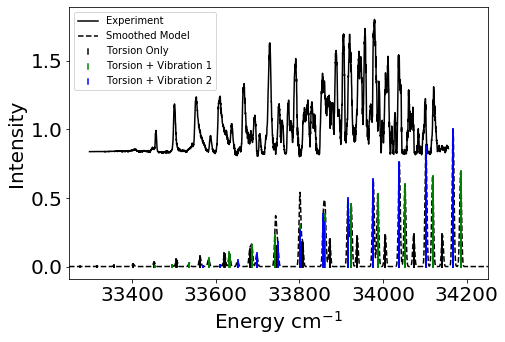

In [40]:
# Wide range

# Set baseline to zero 

kidwell_uv_spectrum_energy = np.loadtxt('2PhPy UV Spectrum.txt',usecols=1)
kidwell_uv_spectrum_intensity = np.loadtxt('2PhPy UV Spectrum.txt',usecols=0)

# Set baseline to zero 

kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity-min(kidwell_uv_spectrum_intensity)

# Normalize
kidwell_uv_spectrum_intensity = kidwell_uv_spectrum_intensity/max(kidwell_uv_spectrum_intensity)

fig = plt.figure(figsize = (7.5,5))
ax = fig.add_subplot(1,1,1) 

#ax.set_xlim(min(kidwell_uv_spectrum_energy)-200,max(kidwell_uv_spectrum_energy)+400)

ax.set_xlabel('Energy cm$^{-1}$', fontsize = 20)
ax.set_ylabel('Intensity', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

# ax.set_title('Masses set to '+str(mass_ground)+' , '+str(mass_excited) + ' atomic units', fontsize = 12)
ax.set_xlim(33250,34250)

max_freq = 38000
 
#ax.plot(angles, kidwell_gs_with_h2o_interpolate_values*AU_TO_WAVENUMBER,label='Kidwell GS Potential with Water', color='r',ls='-')
ax.plot(kidwell_uv_spectrum_energy, kidwell_uv_spectrum_intensity+0.8,label='Experiment', color='k',ls='-')


theory_plot_intensities = theory_intensities/max(theory_intensities)

# Plot the theory spectrum
ax.plot(theory_frequencies, theory_plot_intensities,label='Smoothed Model', color='k',ls='dashed')

# Scale the overlaps that come from the excited state

wavefunction_overlaps_for_plotting = wavefunction_overlaps.copy()

wavefunction_ground_vib_state_for_plotting = list()
wavefunction_excited_vib_state_0_for_plotting = list()
wavefunction_excited_vib_state_1_for_plotting = list()


# Want to have different colors depending on if the origin is 
for wavefunction_overlap in wavefunction_overlaps_for_plotting:
    if 'vib_excited_0' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_0_for_plotting.append(wavefunction_overlap)
    elif 'vib_excited_1' in wavefunction_overlap['excited_state_id']:
        wavefunction_excited_vib_state_1_for_plotting.append(wavefunction_overlap)
    else:
        wavefunction_ground_vib_state_for_plotting.append(wavefunction_overlap)

# Now add in the stem plot

vibrational_state_overlaps_df = pd.DataFrame(wavefunction_overlaps_for_plotting)


wavefunction_ground_vib_state_for_plotting_df = pd.DataFrame(wavefunction_ground_vib_state_for_plotting)

wavefunction_excited_vib_state_0_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_0_for_plotting)

wavefunction_excited_vib_state_1_for_plotting_df = pd.DataFrame(wavefunction_excited_vib_state_1_for_plotting)

# normalize impulse heights
max_ground_state_height = max(wavefunction_ground_vib_state_for_plotting_df['overlap'])
max_vib_0_excited_state_height = max(wavefunction_excited_vib_state_0_for_plotting_df['overlap'])
max_vib_1_excited_state_height = max(wavefunction_excited_vib_state_1_for_plotting_df['overlap'])

max_height = max(max_ground_state_height,max_vib_0_excited_state_height,max_vib_1_excited_state_height)


#ax.stem(vibrational_state_overlaps_df['energy']*AU_TO_WAVENUMBER+offset, 
#        vibrational_state_overlaps_df['overlap'],linefmt='g-',markerfmt=' ',label='All',
#       basefmt=" ")

ax.stem(wavefunction_ground_vib_state_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
        wavefunction_ground_vib_state_for_plotting_df['overlap']/max_height,linefmt='k-',markerfmt=' ',label='Torsion Only',
       basefmt=" ")

#print(wavefunction_ground_vib_state_for_plotting_df)

ax.stem(wavefunction_excited_vib_state_0_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_0_for_plotting_df['overlap']/max_height,linefmt='g-',markerfmt=' ',label='Torsion + Vibration 1',
       basefmt=" ")

ax.stem(wavefunction_excited_vib_state_1_for_plotting_df['energy']*AU_TO_WAVENUMBER+offset, 
      wavefunction_excited_vib_state_1_for_plotting_df['overlap']/max_height,linefmt='b-',markerfmt=' ',label='Torsion + Vibration 2',
       basefmt=" ")



ax.legend()
plt.savefig('./theory_exp_spectrum_multiple_vibs_narrow_range.pdf',bbox_inches='tight')
plt.show()



In [42]:
# Plot the lowest 4 ground state wavefunctions
ground_state_file_name_root='gs_scan_no_h2o'
excited_state_file_name_root='es_scan_no_h2o'
max_num_ground_state_wfs=4
max_num_excited_state_wfs=100


In [43]:
ground_state_dict = read_dvr_output(filename_root=ground_state_file_name_root,num_states=max_num_ground_state_wfs)
excited_state_dict = read_dvr_output(filename_root=excited_state_file_name_root,num_states=max_num_excited_state_wfs)


Examining state gs_scan_no_h2o_0


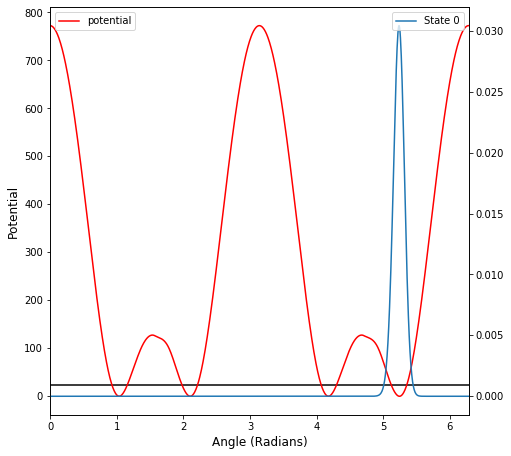

Examining state gs_scan_no_h2o_1


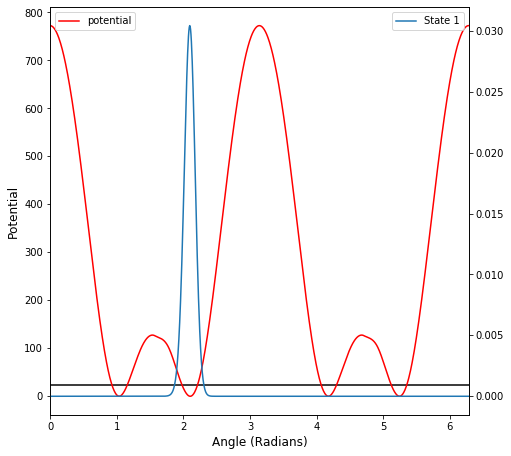

Examining state gs_scan_no_h2o_2


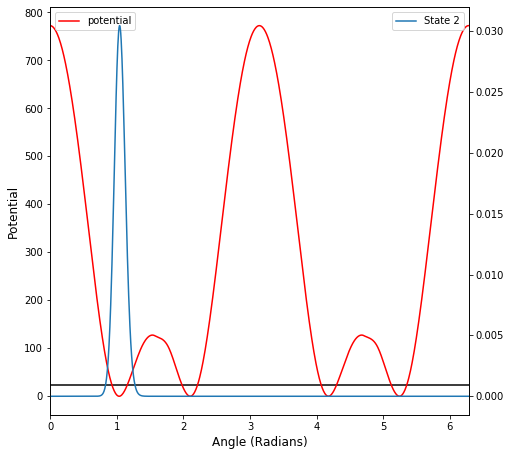

Examining state gs_scan_no_h2o_3


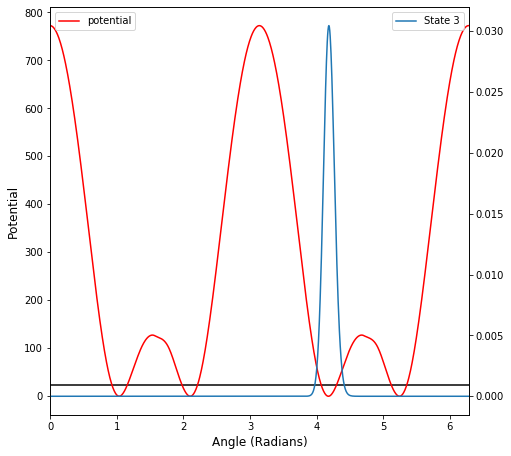

In [44]:
# plot the potential and square of the wavefunction 
# (avoids ambiguity on signs) of the ground state potential

wavefunction_counter = 0

max_wavefunctions = 4

for i in range(0,4):
    plot_wavefunction_squared(state_dict=ground_state_dict,
                        state_num=i,prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground)

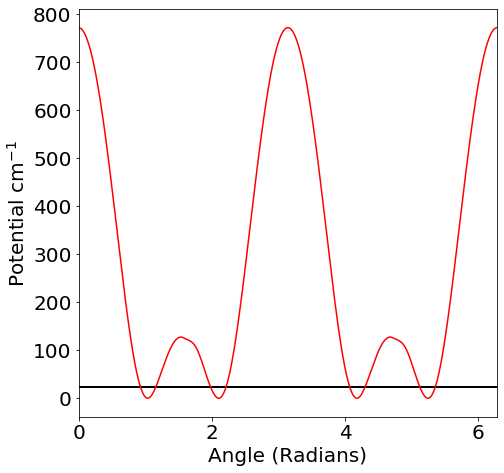

In [45]:
plot_potential_and_energy_levels(state_dict=ground_state_dict,
                       prefix="gs_scan_no_h2o_",
                      plotting_potential_name="gs_scan_no_water_fitted.dat",
                     potential="Ground State PES",mass=mass_ground,max_energy=200)

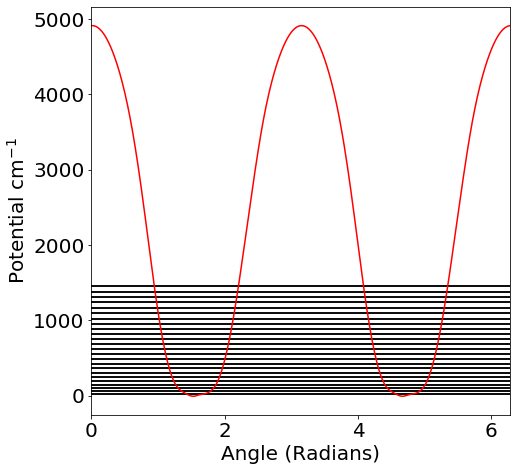

In [46]:
plot_potential_and_energy_levels(state_dict=excited_state_dict,
                       prefix="es_scan_no_h2o",
                      plotting_potential_name="es_scan_no_water_fitted.dat",
                     potential="Excited State PES",mass=mass_ground,max_energy=1500)

In [110]:
# Get maximum overlaps so we can plot those excited state wavefunctions
overlap_df.sort_values(by=['overlap'],ascending=False).head(60)

,energy,ground_state_id,excited_state_id,overlap
164,0.004367,gs_scan_no_h2o_1_vib_excited_1,es_scan_no_h2o_24_vib_excited_1,0.269433
77,0.004367,gs_scan_no_h2o_0_vib_excited_1,es_scan_no_h2o_25_vib_excited_1,0.269433
347,0.004366,gs_scan_no_h2o_3_vib_excited_1,es_scan_no_h2o_25_vib_excited_1,0.265378
254,0.004366,gs_scan_no_h2o_2_vib_excited_1,es_scan_no_h2o_24_vib_excited_1,0.265378
251,0.004066,gs_scan_no_h2o_2_vib_excited_1,es_scan_no_h2o_23_vib_excited_1,0.234239
338,0.004066,gs_scan_no_h2o_3_vib_excited_1,es_scan_no_h2o_22_vib_excited_1,0.234239
68,0.004066,gs_scan_no_h2o_0_vib_excited_1,es_scan_no_h2o_22_vib_excited_1,0.232007
161,0.004066,gs_scan_no_h2o_1_vib_excited_1,es_scan_no_h2o_23_vib_excited_1,0.232007
335,0.003770,gs_scan_no_h2o_3_vib_excited_1,es_scan_no_h2o_21_vib_excited_1,0.200017
242,0.003770,gs_scan_no_h2o_2_vib_excited_1,es_scan_no_h2o_20_vib_excited_1,0.200017


In [111]:
# Export overlap to csv file

overlap_df.to_csv('./phpy_overlap_list.csv')